# นำข้อมูลเข้า และ Clean ข้อมูล

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AGB_Data.xlsx to AGB_Data (1).xlsx
User uploaded file "AGB_Data (1).xlsx" with length 11978 bytes


In [ ]:
import pandas as pd

file_path = "AGB_Data.xlsx"
df = pd.read_excel(file_path)

print("🔹 ข้อมูล 5 แถวแรก:")
print(df.head())

print("\n🔹 ข้อมูลเบื้องต้น (info):")
print(df.info())

🔹 ข้อมูล 5 แถวแรก:
    NDVI  TNDVI     SR   SAVI  MSAVI2        AGB
0 -0.072  0.654  0.866 -0.108  -0.154   7.158685
1 -0.072  0.654  0.866 -0.108  -0.154  12.112405
2 -0.056  0.666  0.894 -0.084  -0.118  21.010835
3 -0.048  0.672  0.908 -0.072  -0.101  24.553987
4 -0.041  0.678  0.922 -0.061  -0.084  25.799105

🔹 ข้อมูลเบื้องต้น (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    55 non-null     float64
 1   TNDVI   55 non-null     float64
 2   SR      55 non-null     float64
 3   SAVI    55 non-null     float64
 4   MSAVI2  55 non-null     float64
 5   AGB     55 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB
None


# วิเคราะห์การกระจายของข้อมูล

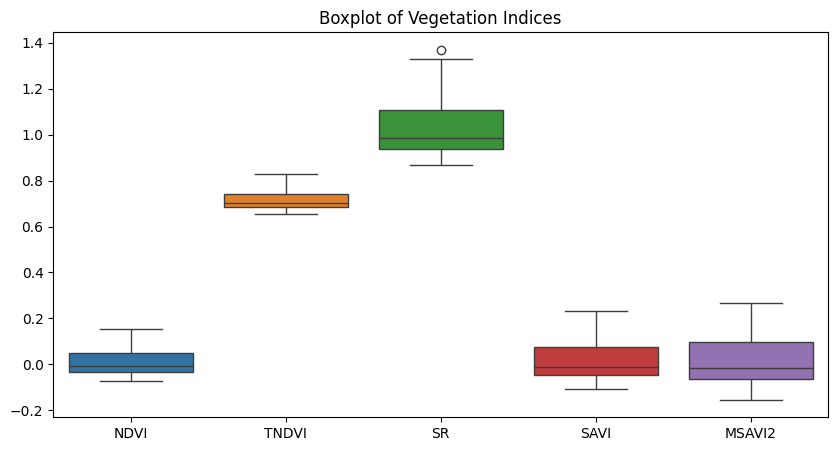

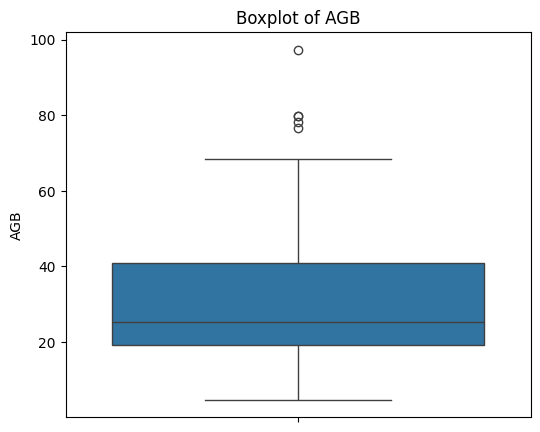

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot ดัชนีพืชพรรณ 5 ตัว
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']])
plt.title('Boxplot of Vegetation Indices')
plt.show()

#Boxplot ของ AGB แยกต่างหาก
plt.figure(figsize=(6, 5))
sns.boxplot(data=df['AGB'])
plt.title('Boxplot of AGB')
plt.show()

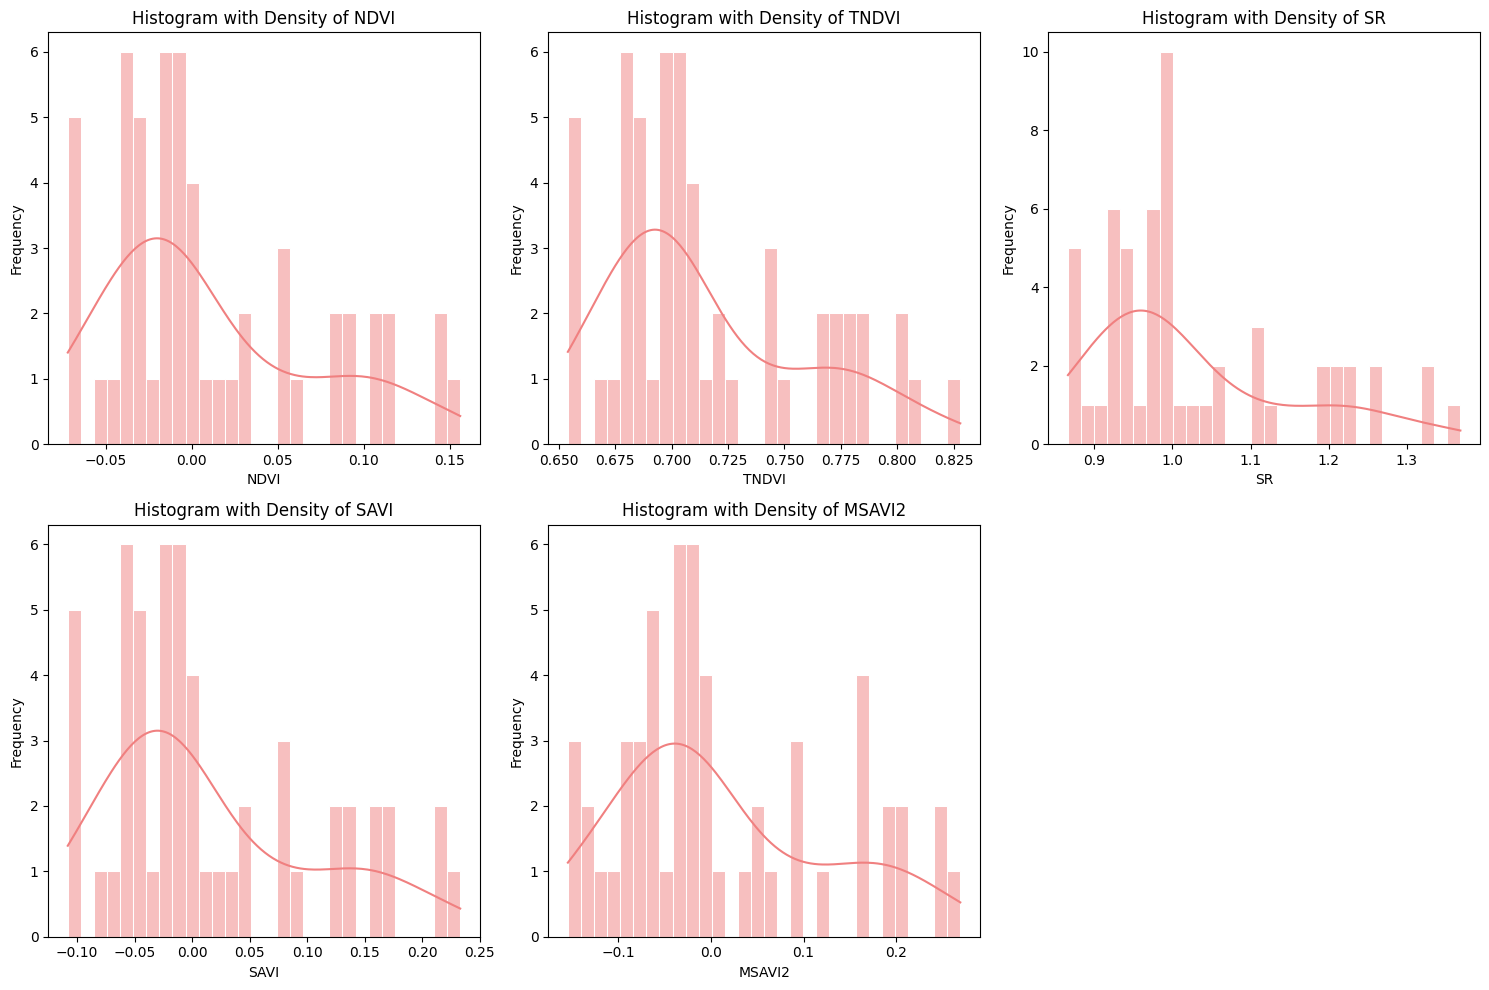

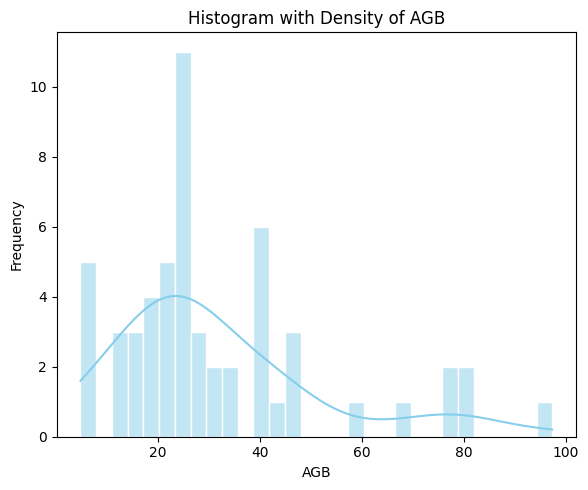

In [ ]:
features = ["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='lightcoral', edgecolor='white', bins=30)
    plt.title(f"Histogram with Density of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(df["AGB"], kde=True, color='skyblue', edgecolor='white', bins=30)
plt.title("Histogram with Density of AGB")
plt.xlabel("AGB")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**แปลงข้อมูล**

In [ ]:
import numpy as np

# แปลง AGB
df['AGB_cuberoot'] = np.cbrt(df['AGB'])     # cube root

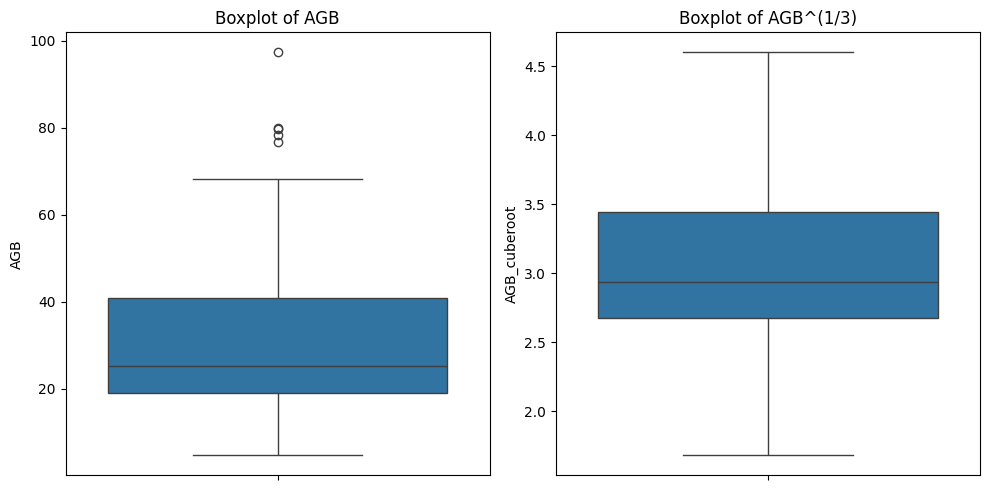

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["AGB"])
plt.title("Boxplot of AGB")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["AGB_cuberoot"])
plt.title("Boxplot of AGB^(1/3)")

plt.tight_layout()
plt.show()

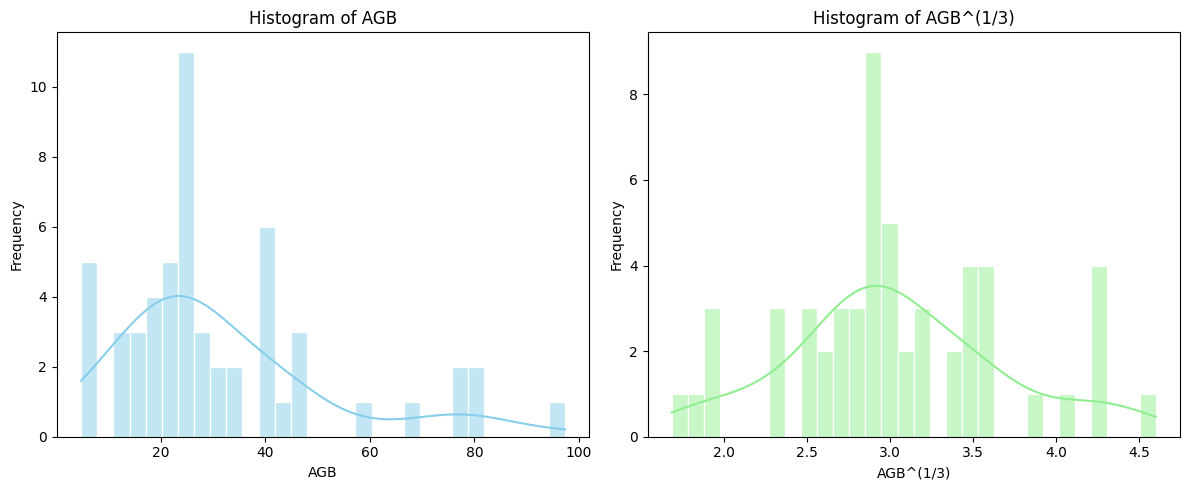

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram + Density for Original AGB
plt.subplot(1, 2, 1)
sns.histplot(df["AGB"], kde=True, color='skyblue', edgecolor='white', bins=30)
plt.title("Histogram of AGB")
plt.xlabel("AGB")
plt.ylabel("Frequency")

# Histogram + Density for sqrt(AGB)
plt.subplot(1, 2, 2)
sns.histplot(df["AGB_cuberoot"], kde=True, color='lightgreen', edgecolor='white', bins=30)
plt.title("Histogram of AGB^(1/3)")
plt.xlabel("AGB^(1/3)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

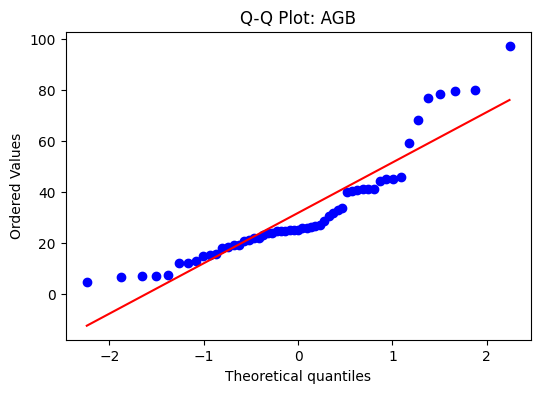

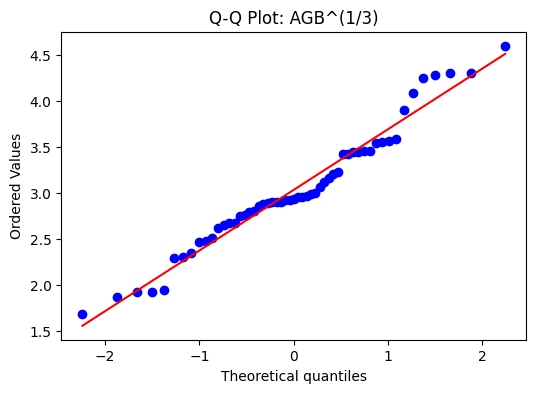

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(df["AGB"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB")
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(df["AGB_cuberoot"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB^(1/3)")
plt.show()

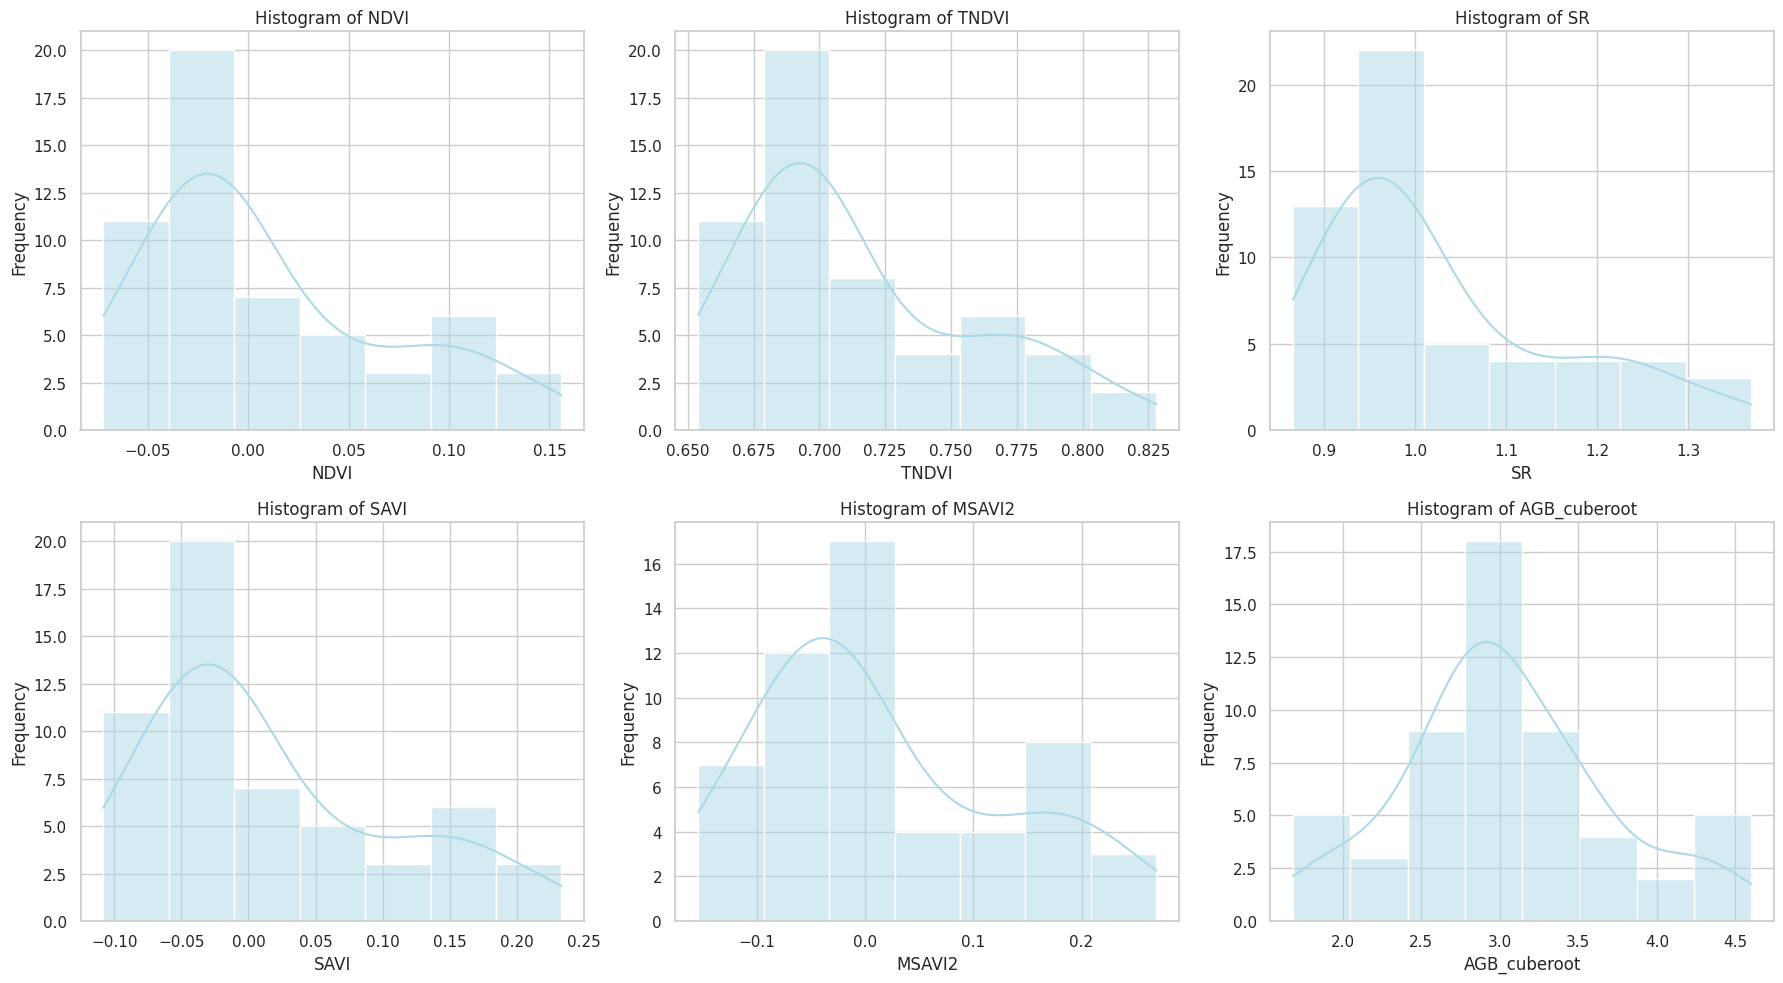

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create figure with 2 rows and 3 columns for 6 variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# List of variables: 5 independent + 1 transformed dependent
variables = ["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB_cuberoot"]

# Plot histogram with KDE for each variable
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, ax=axes[i], color="lightblue", edgecolor="white")
    axes[i].set_title(f"Histogram of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ตรวจสอบความสัมพันธ์ระหว่างตัวแปร (Correlation)

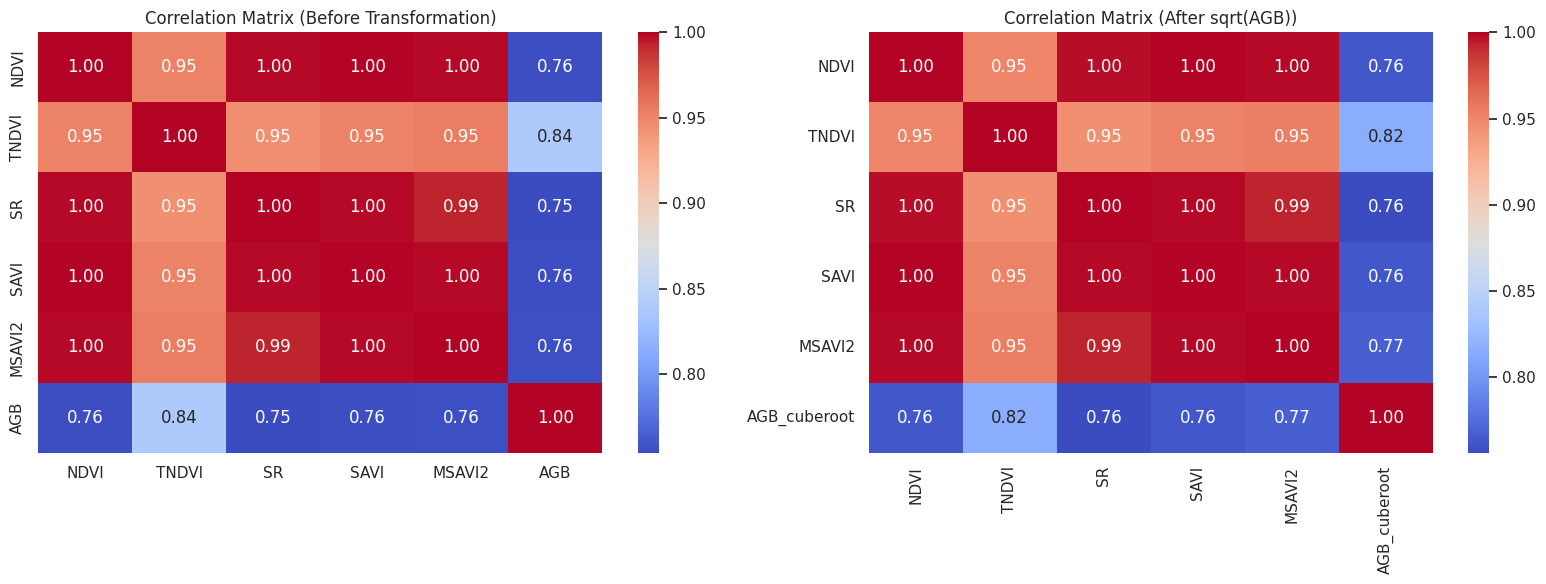

In [ ]:
# คำนวณ correlation matrix แบบแรก (ยังไม่แปลง)
corr_before = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB"]].corr()

# คำนวณ correlation matrix แบบหลังแปลง
corr_after = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB_cuberoot"]].corr()

# สร้างกราฟ Heatmap เปรียบเทียบ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix (Before Transformation)")

sns.heatmap(corr_after, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix (After sqrt(AGB))")

plt.tight_layout()
plt.show()

**คำนวน matrix ค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างตัวแปรต้นด้วยกันเอง**

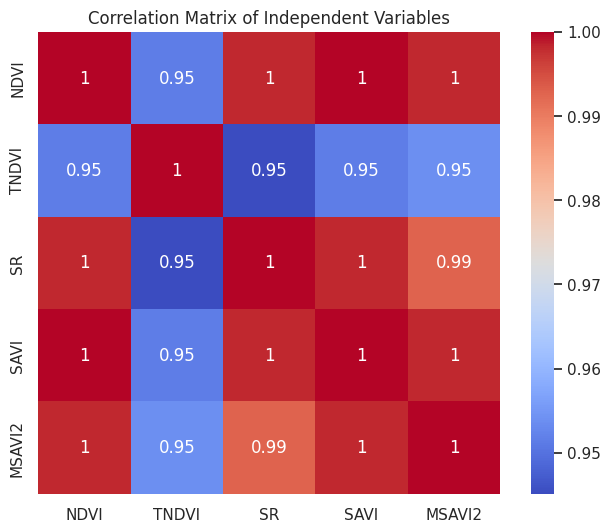

In [ ]:
# เลือกเฉพาะตัวแ variableต้น
X = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2"]]

# คำนวณ correlation matrix
corr_matrix = X.corr()

# วาด heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Independent Variables")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# เลือกตัวแปรต้น (เปลี่ยนชื่อให้ตรงกับตัวแปรจริงของคุณ)
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
X = add_constant(X)

# สร้างตาราง VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.round(2))

  Variable        VIF
0    const  304266.60
1     NDVI   33956.59
2    TNDVI      11.31
3       SR    5011.63
4     SAVI   38692.64
5   MSAVI2    5331.09


จากการ

# สร้าง Model Linear regression ด้วยวิธี stepwise regression เพื่อเลืกตัวแปรที่เหมาะสม #


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# แยกตัวแปรต้น (X) และตัวแปรตามที่แปลงแล้ว (y)
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y = df["AGB_cuberoot"]  # ตัวแปรตามแบบแปลง sqrt แล้ว

# แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stepwise: Forward + Backward
sfs = SFS(LinearRegression(),
          k_features='best', forward=True, floating=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

# แสดงตัวแ variable ที่ถูกเลือก
selected_features = list(sfs.k_feature_names_) # Corrected attribute name
print("ตัวแปรที่ถูกเลือกโดย Stepwise Regression:", selected_features)

ตัวแปรที่ถูกเลือกโดย Stepwise Regression: ['TNDVI']


In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X[['TNDVI']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AGB_cuberoot   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           3.06e-14
Time:                        02:21:01   Log-Likelihood:                -23.916
No. Observations:                  55   AIC:                             51.83
Df Residuals:                      53   BIC:                             55.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5245      0.833     -6.629      0.0

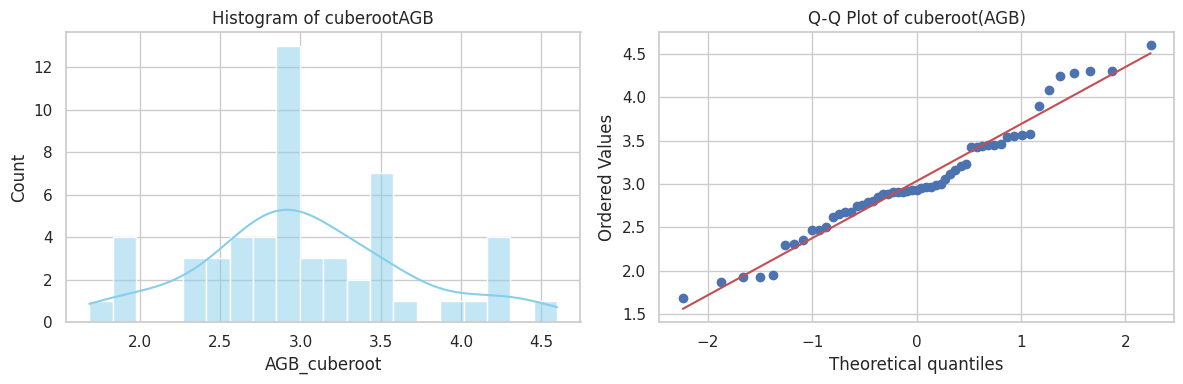

In [ ]:
# Histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['AGB_cuberoot'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of cuberootAGB')
plt.xlabel('AGB_cuberoot')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df['AGB_cuberoot'], dist="norm", plot=plt)
plt.title('Q-Q Plot of cuberoot(AGB)')

plt.tight_layout()
plt.show()

In [ ]:
shapiro_test = stats.shapiro(df['AGB_cuberoot'])
print(f'Shapiro-Wilk Test statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}')

Shapiro-Wilk Test statistic = 0.9670, p-value = 0.1341


In [ ]:
import scipy.stats as stats

shapiro_test = stats.shapiro(df['AGB'])
print(f'Shapiro-Wilk Test statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:}')

Shapiro-Wilk Test statistic = 0.8628, p-value = 1.591526201687683e-05


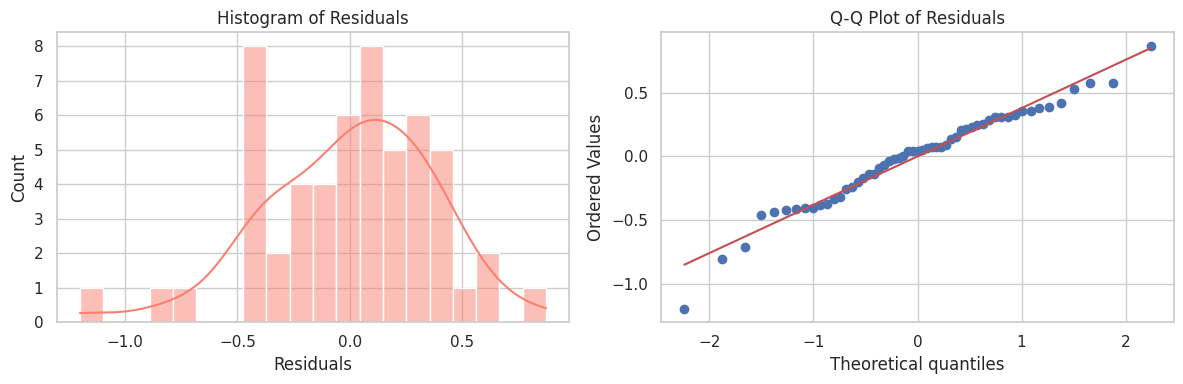

In [ ]:
# สร้างโมเดลจาก TNDVI
X = sm.add_constant(df[['TNDVI']])
y = df['AGB_cuberoot']
model = sm.OLS(y, X).fit()

# คำนวณ residuals
residuals = model.resid

# Histogram และ Q-Q Plot
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='salmon', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

In [ ]:
shapiro_test_resid = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test statistic = {shapiro_test_resid.statistic:.4f}, p-value = {shapiro_test_resid.pvalue:.4f}')

Shapiro-Wilk Test statistic = 0.9728, p-value = 0.2452


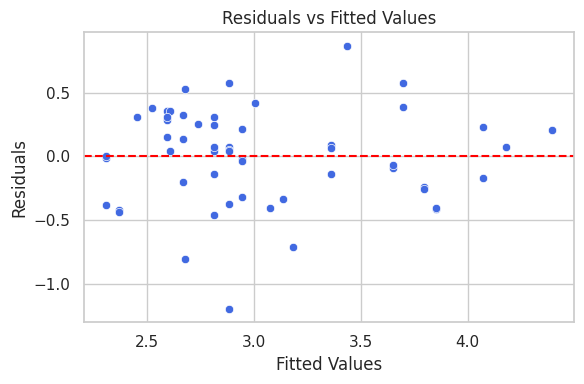

In [ ]:
# ดึงค่าที่จำเป็น
fitted_vals = model.fittedvalues
residuals = model.resid

# Scatter plot: Residuals vs Fitted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals, color='royalblue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan # Import the function

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)

# unpack ค่าที่ได้
bp_stat = bp_test[0]
bp_pvalue = bp_test[1] # Added closing bracket
print(f"Breusch-Pagan Test statistic = {bp_stat:.2f}, p-value = {bp_pvalue:.4f}")

Breusch-Pagan Test statistic = 0.07, p-value = 0.7918


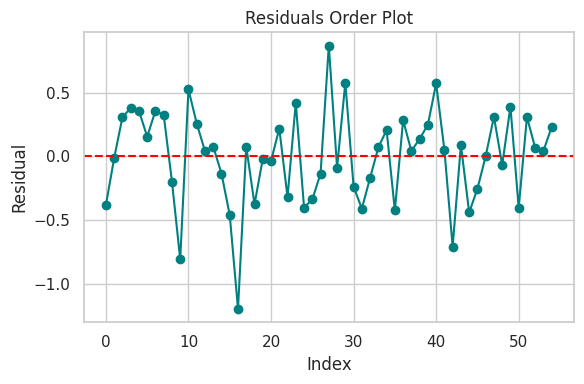

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(residuals.values, marker='o', linestyle='-', color='teal')
plt.title('Residuals Order Plot')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(0, linestyle='--', color='red')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.2f}')

Durbin-Watson statistic: 1.96


MSE: 0.14
R-squared: 0.67


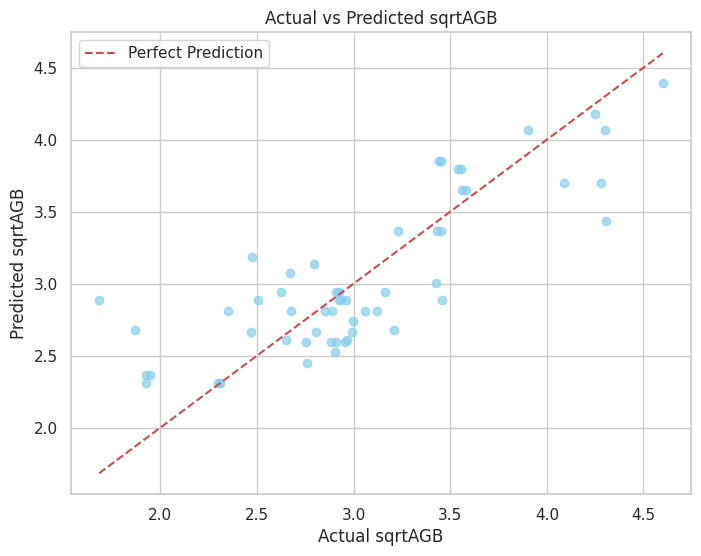

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Import the functions

# เตรียมข้อมูล
X = df[['TNDVI']]
y = df['AGB_cuberoot']

# สร้างและฝึกโมเดล
model = LinearRegression()
model.fit(X, y)

# ทำนายค่า
y_pred = model.predict(X)

# คำนวณค่าความคลาดเคลื่อนและ R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# แสดงผลลัพธ์
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# วาดกราฟค่าจริง vs ค่าทำนาย
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual sqrtAGB')
plt.ylabel('Predicted sqrtAGB')
plt.title('Actual vs Predicted sqrtAGB')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ทำนายค่า AGB_cuberoot จากโมเดล linear regression ที่ฝึกไว้
y_pred_cuberoot = model.predict(X)

# แปลงกลับเป็นค่า AGB (ยกกำลัง 3)
y_pred_agb = y_pred_cuberoot ** 3
y_true_agb = y.values ** 3 # ใช้ y ที่เป็น AGB_cuberoot แล้วยกกำลัง 3 กลับ

# สร้างตารางเปรียบเทียบ
compare_df = pd.DataFrame({
    'True_AGB': np.round(y_true_agb, 2),
    'Predicted_AGB': np.round(y_pred_agb, 2),
    'Difference': np.round(y_true_agb - y_pred_agb, 2)
})

# แสดงผล 10 แถวแรก
print(compare_df.head(10))

   True_AGB  Predicted_AGB  Difference
0      7.16          12.31       -5.15
1     12.11          12.31       -0.20
2     21.01          14.75        6.26
3     24.55          16.09        8.47
4     25.80          17.50        8.30
5     20.84          17.50        3.34
6     26.11          17.74        8.36
7     26.82          18.99        7.82
8     15.08          18.99       -3.92
9      6.55          19.25      -12.70


# Model RF แบบไม่แปลงค่า AGB  #

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# เตรียมข้อมูล
X = data[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]  # ตัวแปรต้น
y = data['AGB']  # ตัวแปรตาม (ไม่แปลง)

# แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'data' is not defined

In [ ]:
# สร้างและฝึกโมเดล
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ทำนาย
y_pred = rf_model.predict(X_test)

In [ ]:
# ประเมินผล
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

In [ ]:
# กราฟค่าจริง vs ค่าทำนาย
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual AGB')
plt.ylabel('Predicted AGB')
plt.title('Random Forest: Predicted vs Actual AGB')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model RF แบบแปลงค่า AGB (sqrt(AGB)) #

In [ ]:
# สร้าง target ใหม่แบบแปลงรากที่สอง
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

In [ ]:
# สร้างและฝึก Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_sqrt)

# ทำนายผล
y_pred_sqrt = rf_model.predict(X_test)

# แปลงค่าทำนายกลับเป็นหน่วย AGB เดิม
y_pred_agb = y_pred_sqrt ** 2

In [ ]:
# ประเมินผล
mse = mean_squared_error(y_test, y_pred_agb)
r2 = r2_score(y_test, y_pred_agb)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

In [ ]:
# สร้างกราฟ
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_agb, color='skyblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual AGB", fontsize=12)
plt.ylabel("Predicted AGB", fontsize=12)
plt.title("Random Forest: Predicted vs Actual AGB", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Model RF แบบแปลงค่า AGB (log(AGB)) #

In [ ]:
# แปลง AGB ด้วย log
data['log_AGB'] = np.log(data['AGB'])

# สร้างโมเดล RF จาก log_AGB
X = data[features]  # features คือคอลัมน์ตัวแปรอิสระ เช่น ['NDVI', 'SR', ...]
y_log = data['log_AGB']

rf_log_model = RandomForestRegressor(random_state=42)
rf_log_model.fit(X, y_log)

In [ ]:
# ทำนายและแปลงกลับจาก log → AGB ด้วย exp()
y_log_pred = rf_log_model.predict(X)
y_pred_agb = np.exp(y_log_pred)

# ประเมินผล
mse_log = mean_squared_error(data['AGB'], y_pred_agb)
r2_log = r2_score(data['AGB'], y_pred_agb)

print(f"Mean Squared Error (MSE): {mse_log:.4f}")
print(f"R-squared (R²): {r2_log:.4f}")

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data['AGB'], y_pred_agb, color='skyblue', alpha=0.7)
plt.plot([data['AGB'].min(), data['AGB'].max()],
         [data['AGB'].min(), data['AGB'].max()],
         'r--', lw=2)
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB (from log)")
plt.title("Random Forest with log(AGB)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Random Forest (Untransformed AGB): Actual vs Predicted")
print(compare_rf_untransformed.head())
print("-" * 30)

print("Random Forest (sqrt(AGB)): Actual vs Predicted (AGB units)")
print(compare_rf_sqrt.head())
print("-" * 30)

print("Random Forest (log(AGB)): Actual vs Predicted (AGB units)")
print(compare_rf_log.head())